In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
file_path = r"C:\Users\ACER\OneDrive\Desktop\Unifiedmentor\lung_cancer\Lung Cancer\dataset_med.csv"
data = pd.read_csv(file_path)


In [2]:
data.head()

,id,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,1,64.0,Male,Sweden,2016-04-05,Stage I,Yes,Passive Smoker,29.4,199,0,0,1,0,Chemotherapy,2017-09-10,0
1,2,50.0,Female,Netherlands,2023-04-20,Stage III,Yes,Passive Smoker,41.2,280,1,1,0,0,Surgery,2024-06-17,1
2,3,65.0,Female,Hungary,2023-04-05,Stage III,Yes,Former Smoker,44.0,268,1,1,0,0,Combined,2024-04-09,0
3,4,51.0,Female,Belgium,2016-02-05,Stage I,No,Passive Smoker,43.0,241,1,1,0,0,Chemotherapy,2017-04-23,0
4,5,37.0,Male,Luxembourg,2023-11-29,Stage I,No,Passive Smoker,19.7,178,0,0,0,0,Combined,2025-01-08,0


In [3]:
data.describe()

,id,age,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,survived
count,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000
mean,445000.500000,55.007008,30.494172,233.633916,0.750024,0.469740,0.225956,0.088157,0.220229
std,256921.014127,9.994485,8.368539,43.432278,0.432999,0.499084,0.418211,0.283524,0.414401
min,1.000000,4.000000,16.000000,150.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,222500.750000,48.000000,23.300000,196.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,445000.500000,55.000000,30.500000,242.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,667500.250000,62.000000,37.700000,271.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,890000.000000,104.000000,45.000000,300.000000,1.000000,1.000000,1.000000,1.000000,1.000000


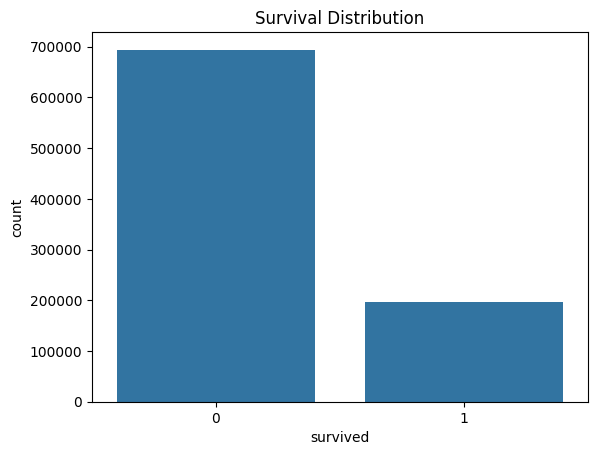

In [4]:
## Data Visualization
# Distribution of target variable
sns.countplot(x='survived', data=data)
plt.title('Survival Distribution')
plt.show()

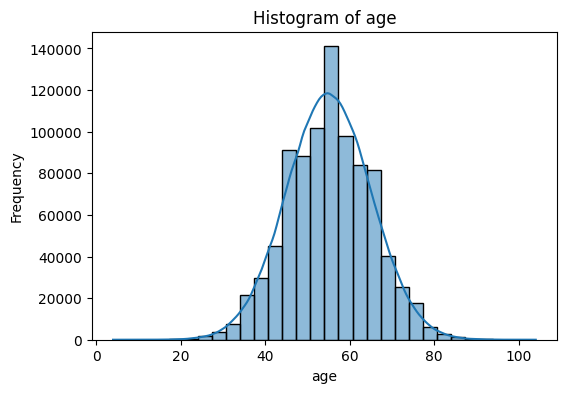

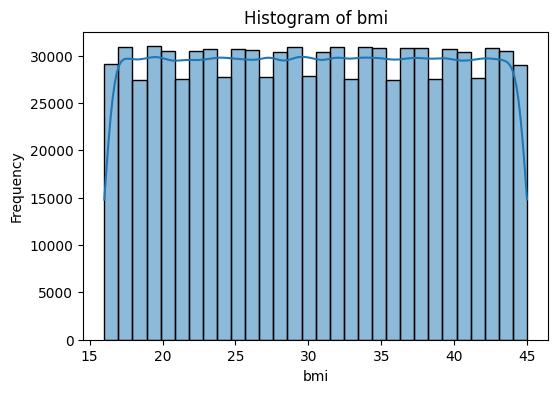

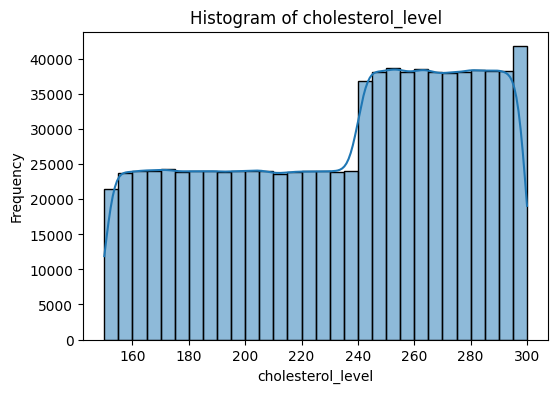

In [5]:
##Age distribution
histogram_list = ['age', 'bmi', 'cholesterol_level'
        ]
for i in histogram_list:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[i], bins=30, kde=True)
    plt.title(f'Histogram of {i}')
    plt.xlabel(i)
    plt.ylabel("Frequency")
    plt.show()



In [6]:
data.columns

Index(['id', 'age', 'gender', 'country', 'diagnosis_date', 'cancer_stage',
       'family_history', 'smoking_status', 'bmi', 'cholesterol_level',
       'hypertension', 'asthma', 'cirrhosis', 'other_cancer', 'treatment_type',
       'end_treatment_date', 'survived'],
      dtype='object')

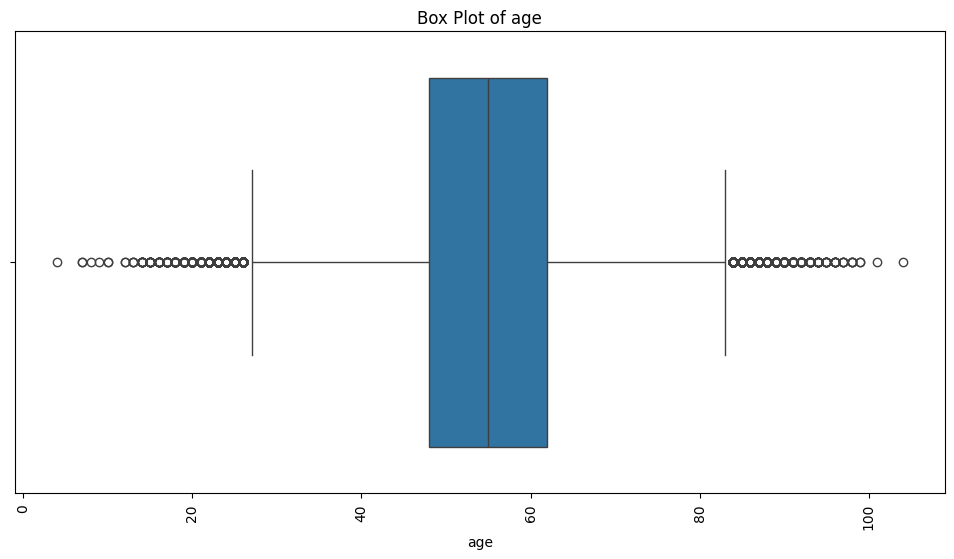

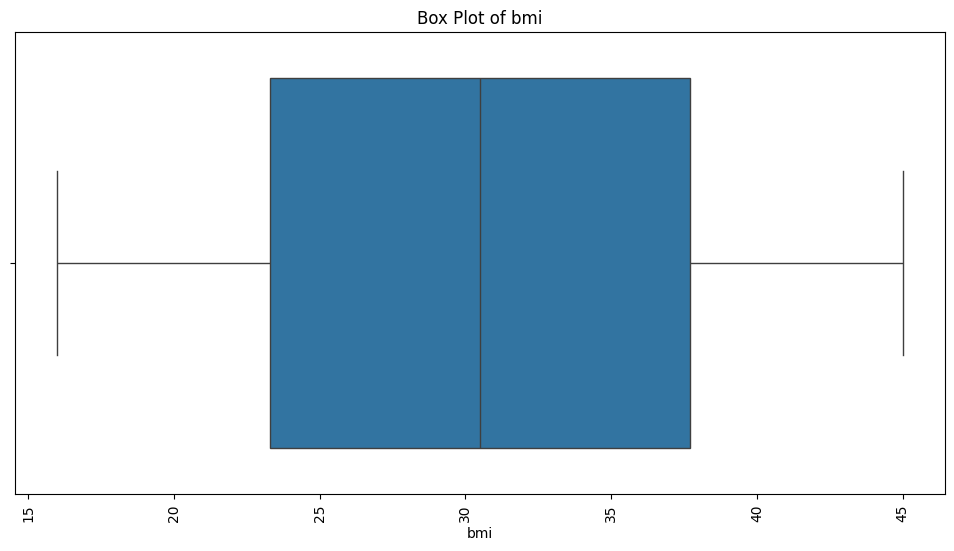

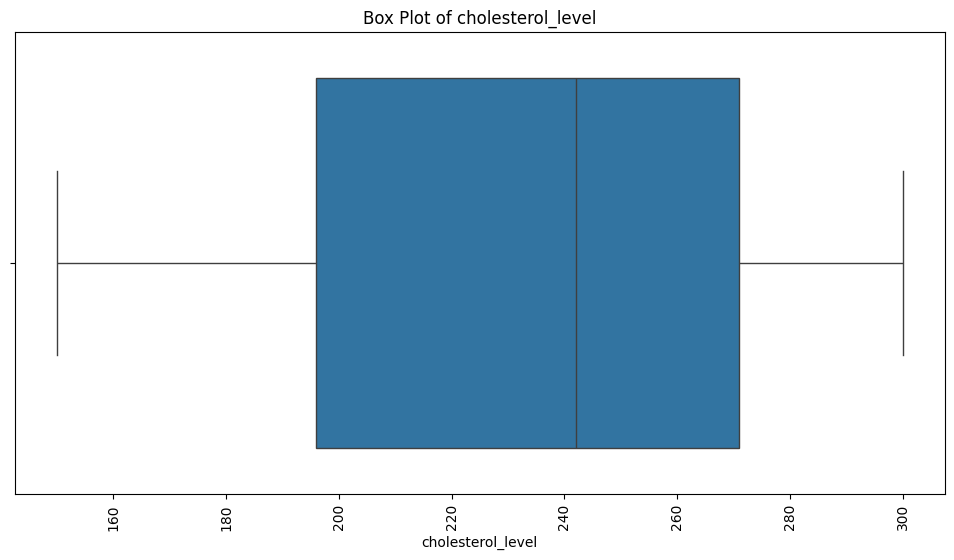

In [7]:
box_plot_list = ['age', 'bmi', 'cholesterol_level']
for i in box_plot_list:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=i, data=data)  # Assuming 'data' is your DataFrame
    plt.title(f"Box Plot of {i}")
    plt.xticks(rotation=90)
    plt.show()


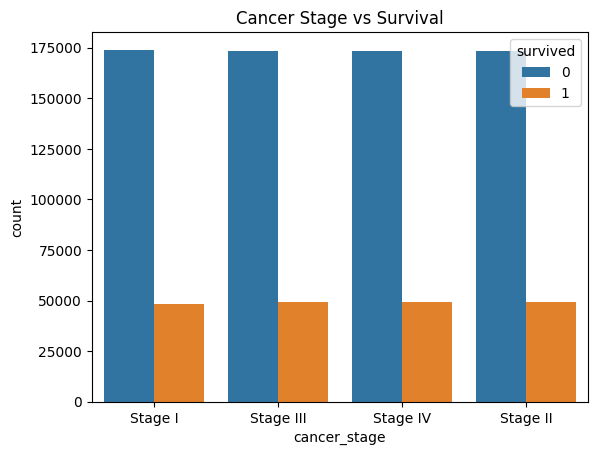

In [8]:
sns.countplot(x='cancer_stage', hue='survived', data=data)
plt.title('Cancer Stage vs Survival')
plt.show()


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [10]:
## data preprocessing
# Impute missing values (numerical: mean, categorical: most frequent)
num_imputer = SimpleImputer(strategy='mean')
cat_imputer = SimpleImputer(strategy='most_frequent')

# Separate numerical and categorical features
num_features = data.select_dtypes(include=['int64', 'float64']).columns
cat_features = data.select_dtypes(include=['object']).columns

# Apply Imputation
data[num_features] = num_imputer.fit_transform(data[num_features])
data[cat_features] = cat_imputer.fit_transform(data[cat_features])

print(data.isnull().sum()) 

id                    0
age                   0
gender                0
country               0
diagnosis_date        0
cancer_stage          0
family_history        0
smoking_status        0
bmi                   0
cholesterol_level     0
hypertension          0
asthma                0
cirrhosis             0
other_cancer          0
treatment_type        0
end_treatment_date    0
survived              0
dtype: int64


In [11]:
data['diagnosis_date'] = pd.to_datetime(data['diagnosis_date'])
data['end_treatment_date'] = pd.to_datetime(data['end_treatment_date'])

# Create a new column for the number of days between dates
data['treatment_duration_days'] = (data['end_treatment_date'] - data['diagnosis_date']).dt.days

# Display result
print(data)


              id   age  gender      country diagnosis_date cancer_stage  \
0            1.0  64.0    Male       Sweden     2016-04-05      Stage I   
1            2.0  50.0  Female  Netherlands     2023-04-20    Stage III   
2            3.0  65.0  Female      Hungary     2023-04-05    Stage III   
3            4.0  51.0  Female      Belgium     2016-02-05      Stage I   
4            5.0  37.0    Male   Luxembourg     2023-11-29      Stage I   
...          ...   ...     ...          ...            ...          ...   
889995  889996.0  40.0    Male        Malta     2022-07-01     Stage IV   
889996  889997.0  62.0  Female       Cyprus     2015-09-27     Stage II   
889997  889998.0  48.0  Female      Estonia     2016-03-27    Stage III   
889998  889999.0  67.0  Female     Slovakia     2015-12-22     Stage IV   
889999  890000.0  55.0  Female        Malta     2021-07-26     Stage II   

       family_history  smoking_status   bmi  cholesterol_level  hypertension  \
0                 Y

In [12]:
from datetime import datetime


In [13]:
data['end_treatment_date'] = pd.to_datetime(data['end_treatment_date'])

# Create a new column for the number of days between dates
data['treatment_duration_days'] = (data['end_treatment_date'] - data['diagnosis_date']).dt.days
today_date = pd.to_datetime(datetime.today().date())  # Ensures only date part is used

# Create a new column for the number of days between today and end_treatment_date
data['days_since_treatment'] = (today_date - data['end_treatment_date']).dt.days

# Display result
print(data)


              id   age  gender      country diagnosis_date cancer_stage  \
0            1.0  64.0    Male       Sweden     2016-04-05      Stage I   
1            2.0  50.0  Female  Netherlands     2023-04-20    Stage III   
2            3.0  65.0  Female      Hungary     2023-04-05    Stage III   
3            4.0  51.0  Female      Belgium     2016-02-05      Stage I   
4            5.0  37.0    Male   Luxembourg     2023-11-29      Stage I   
...          ...   ...     ...          ...            ...          ...   
889995  889996.0  40.0    Male        Malta     2022-07-01     Stage IV   
889996  889997.0  62.0  Female       Cyprus     2015-09-27     Stage II   
889997  889998.0  48.0  Female      Estonia     2016-03-27    Stage III   
889998  889999.0  67.0  Female     Slovakia     2015-12-22     Stage IV   
889999  890000.0  55.0  Female        Malta     2021-07-26     Stage II   

       family_history  smoking_status   bmi  cholesterol_level  hypertension  \
0                 Y

In [14]:
from sklearn.preprocessing import LabelEncoder


In [15]:
data

,id,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived,treatment_duration_days,days_since_treatment
0,1.0,64.0,Male,Sweden,2016-04-05,Stage I,Yes,Passive Smoker,29.4,199.0,0.0,0.0,1.0,0.0,Chemotherapy,2017-09-10,0.0,523,2765
1,2.0,50.0,Female,Netherlands,2023-04-20,Stage III,Yes,Passive Smoker,41.2,280.0,1.0,1.0,0.0,0.0,Surgery,2024-06-17,1.0,424,293
2,3.0,65.0,Female,Hungary,2023-04-05,Stage III,Yes,Former Smoker,44.0,268.0,1.0,1.0,0.0,0.0,Combined,2024-04-09,0.0,370,362
3,4.0,51.0,Female,Belgium,2016-02-05,Stage I,No,Passive Smoker,43.0,241.0,1.0,1.0,0.0,0.0,Chemotherapy,2017-04-23,0.0,443,2905
4,5.0,37.0,Male,Luxembourg,2023-11-29,Stage I,No,Passive Smoker,19.7,178.0,0.0,0.0,0.0,0.0,Combined,2025-01-08,0.0,406,88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
889995,889996.0,40.0,Male,Malta,2022-07-01,Stage IV,No,Passive Smoker,44.8,243.0,1.0,1.0,1.0,0.0,Radiation,2023-02-23,0.0,237,773
889996,889997.0,62.0,Female,Cyprus,2015-09-27,Stage II,Yes,Former Smoker,21.6,240.0,0.0,0.0,0.0,0.0,Surgery,2017-06-19,0.0,631,2848
889997,889998.0,48.0,Female,Estonia,2016-03-27,Stage III,Yes,Never Smoked,38.6,242.0,1.0,0.0,0.0,0.0,Combined,2017-01-23,1.0,302,2995
889998,889999.0,67.0,Female,Slovakia,2015-12-22,Stage IV,Yes,Former Smoker,18.6,194.0,1.0,1.0,0.0,0.0,Chemotherapy,2017-12-12,0.0,721,2672


In [16]:
stage_mapping = {'Stage I': 1, 'Stage II': 2, 'Stage III': 3, 'Stage IV': 4}
data['cancer_stage_num'] = data['cancer_stage'].map(stage_mapping)



In [17]:
data


,id,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived,treatment_duration_days,days_since_treatment,cancer_stage_num
0,1.0,64.0,Male,Sweden,2016-04-05,Stage I,Yes,Passive Smoker,29.4,199.0,0.0,0.0,1.0,0.0,Chemotherapy,2017-09-10,0.0,523,2765,1
1,2.0,50.0,Female,Netherlands,2023-04-20,Stage III,Yes,Passive Smoker,41.2,280.0,1.0,1.0,0.0,0.0,Surgery,2024-06-17,1.0,424,293,3
2,3.0,65.0,Female,Hungary,2023-04-05,Stage III,Yes,Former Smoker,44.0,268.0,1.0,1.0,0.0,0.0,Combined,2024-04-09,0.0,370,362,3
3,4.0,51.0,Female,Belgium,2016-02-05,Stage I,No,Passive Smoker,43.0,241.0,1.0,1.0,0.0,0.0,Chemotherapy,2017-04-23,0.0,443,2905,1
4,5.0,37.0,Male,Luxembourg,2023-11-29,Stage I,No,Passive Smoker,19.7,178.0,0.0,0.0,0.0,0.0,Combined,2025-01-08,0.0,406,88,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
889995,889996.0,40.0,Male,Malta,2022-07-01,Stage IV,No,Passive Smoker,44.8,243.0,1.0,1.0,1.0,0.0,Radiation,2023-02-23,0.0,237,773,4
889996,889997.0,62.0,Female,Cyprus,2015-09-27,Stage II,Yes,Former Smoker,21.6,240.0,0.0,0.0,0.0,0.0,Surgery,2017-06-19,0.0,631,2848,2
889997,889998.0,48.0,Female,Estonia,2016-03-27,Stage III,Yes,Never Smoked,38.6,242.0,1.0,0.0,0.0,0.0,Combined,2017-01-23,1.0,302,2995,3
889998,889999.0,67.0,Female,Slovakia,2015-12-22,Stage IV,Yes,Former Smoker,18.6,194.0,1.0,1.0,0.0,0.0,Chemotherapy,2017-12-12,0.0,721,2672,4


In [18]:


# Mapping for treatment_type 
treatment_mapping = {'Surgery': 1, 'Chemotherapy': 2, 'Radiation': 3, 'Combined': 4} 
data['treatment_type_num'] = data['treatment_type'].map(treatment_mapping)

# Mapping for smoking_status
smoking_mapping = {'Current Smoker': 1, 'Former Smoker': 2, 'Never Smoked': 3, 'Passive Smoker':4}  
data['smoking_status_num'] = data['smoking_status'].map(smoking_mapping)



In [19]:
data

,id,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,...,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived,treatment_duration_days,days_since_treatment,cancer_stage_num,treatment_type_num,smoking_status_num
0,1.0,64.0,Male,Sweden,2016-04-05,Stage I,Yes,Passive Smoker,29.4,199.0,...,1.0,0.0,Chemotherapy,2017-09-10,0.0,523,2765,1,2,4
1,2.0,50.0,Female,Netherlands,2023-04-20,Stage III,Yes,Passive Smoker,41.2,280.0,...,0.0,0.0,Surgery,2024-06-17,1.0,424,293,3,1,4
2,3.0,65.0,Female,Hungary,2023-04-05,Stage III,Yes,Former Smoker,44.0,268.0,...,0.0,0.0,Combined,2024-04-09,0.0,370,362,3,4,2
3,4.0,51.0,Female,Belgium,2016-02-05,Stage I,No,Passive Smoker,43.0,241.0,...,0.0,0.0,Chemotherapy,2017-04-23,0.0,443,2905,1,2,4
4,5.0,37.0,Male,Luxembourg,2023-11-29,Stage I,No,Passive Smoker,19.7,178.0,...,0.0,0.0,Combined,2025-01-08,0.0,406,88,1,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
889995,889996.0,40.0,Male,Malta,2022-07-01,Stage IV,No,Passive Smoker,44.8,243.0,...,1.0,0.0,Radiation,2023-02-23,0.0,237,773,4,3,4
889996,889997.0,62.0,Female,Cyprus,2015-09-27,Stage II,Yes,Former Smoker,21.6,240.0,...,0.0,0.0,Surgery,2017-06-19,0.0,631,2848,2,1,2
889997,889998.0,48.0,Female,Estonia,2016-03-27,Stage III,Yes,Never Smoked,38.6,242.0,...,0.0,0.0,Combined,2017-01-23,1.0,302,2995,3,4,3
889998,889999.0,67.0,Female,Slovakia,2015-12-22,Stage IV,Yes,Former Smoker,18.6,194.0,...,0.0,0.0,Chemotherapy,2017-12-12,0.0,721,2672,4,2,2


In [20]:
#Mapping for gender
gender_mapping = {'Male': 1, 'Female': 2} 
data['gender_mapping_num'] = data['gender'].map(gender_mapping)

# Mapping for family_history
family_history_mapping = {'Yes': 1, 'No': 2}  
data['family_mapping_num'] = data['family_history'].map(family_history_mapping)

In [21]:
data

,id,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,...,treatment_type,end_treatment_date,survived,treatment_duration_days,days_since_treatment,cancer_stage_num,treatment_type_num,smoking_status_num,gender_mapping_num,family_mapping_num
0,1.0,64.0,Male,Sweden,2016-04-05,Stage I,Yes,Passive Smoker,29.4,199.0,...,Chemotherapy,2017-09-10,0.0,523,2765,1,2,4,1,1
1,2.0,50.0,Female,Netherlands,2023-04-20,Stage III,Yes,Passive Smoker,41.2,280.0,...,Surgery,2024-06-17,1.0,424,293,3,1,4,2,1
2,3.0,65.0,Female,Hungary,2023-04-05,Stage III,Yes,Former Smoker,44.0,268.0,...,Combined,2024-04-09,0.0,370,362,3,4,2,2,1
3,4.0,51.0,Female,Belgium,2016-02-05,Stage I,No,Passive Smoker,43.0,241.0,...,Chemotherapy,2017-04-23,0.0,443,2905,1,2,4,2,2
4,5.0,37.0,Male,Luxembourg,2023-11-29,Stage I,No,Passive Smoker,19.7,178.0,...,Combined,2025-01-08,0.0,406,88,1,4,4,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
889995,889996.0,40.0,Male,Malta,2022-07-01,Stage IV,No,Passive Smoker,44.8,243.0,...,Radiation,2023-02-23,0.0,237,773,4,3,4,1,2
889996,889997.0,62.0,Female,Cyprus,2015-09-27,Stage II,Yes,Former Smoker,21.6,240.0,...,Surgery,2017-06-19,0.0,631,2848,2,1,2,2,1
889997,889998.0,48.0,Female,Estonia,2016-03-27,Stage III,Yes,Never Smoked,38.6,242.0,...,Combined,2017-01-23,1.0,302,2995,3,4,3,2,1
889998,889999.0,67.0,Female,Slovakia,2015-12-22,Stage IV,Yes,Former Smoker,18.6,194.0,...,Chemotherapy,2017-12-12,0.0,721,2672,4,2,2,2,1


In [22]:
data = data.drop(columns=['gender', 'country', 'diagnosis_date', 'cancer_stage',
       'family_history', 'smoking_status', 'treatment_type',
       'end_treatment_date'])

In [23]:
data = data.drop(columns=['id'])

In [24]:
data

,age,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,survived,treatment_duration_days,days_since_treatment,cancer_stage_num,treatment_type_num,smoking_status_num,gender_mapping_num,family_mapping_num
0,64.0,29.4,199.0,0.0,0.0,1.0,0.0,0.0,523,2765,1,2,4,1,1
1,50.0,41.2,280.0,1.0,1.0,0.0,0.0,1.0,424,293,3,1,4,2,1
2,65.0,44.0,268.0,1.0,1.0,0.0,0.0,0.0,370,362,3,4,2,2,1
3,51.0,43.0,241.0,1.0,1.0,0.0,0.0,0.0,443,2905,1,2,4,2,2
4,37.0,19.7,178.0,0.0,0.0,0.0,0.0,0.0,406,88,1,4,4,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
889995,40.0,44.8,243.0,1.0,1.0,1.0,0.0,0.0,237,773,4,3,4,1,2
889996,62.0,21.6,240.0,0.0,0.0,0.0,0.0,0.0,631,2848,2,1,2,2,1
889997,48.0,38.6,242.0,1.0,0.0,0.0,0.0,1.0,302,2995,3,4,3,2,1
889998,67.0,18.6,194.0,1.0,1.0,0.0,0.0,0.0,721,2672,4,2,2,2,1


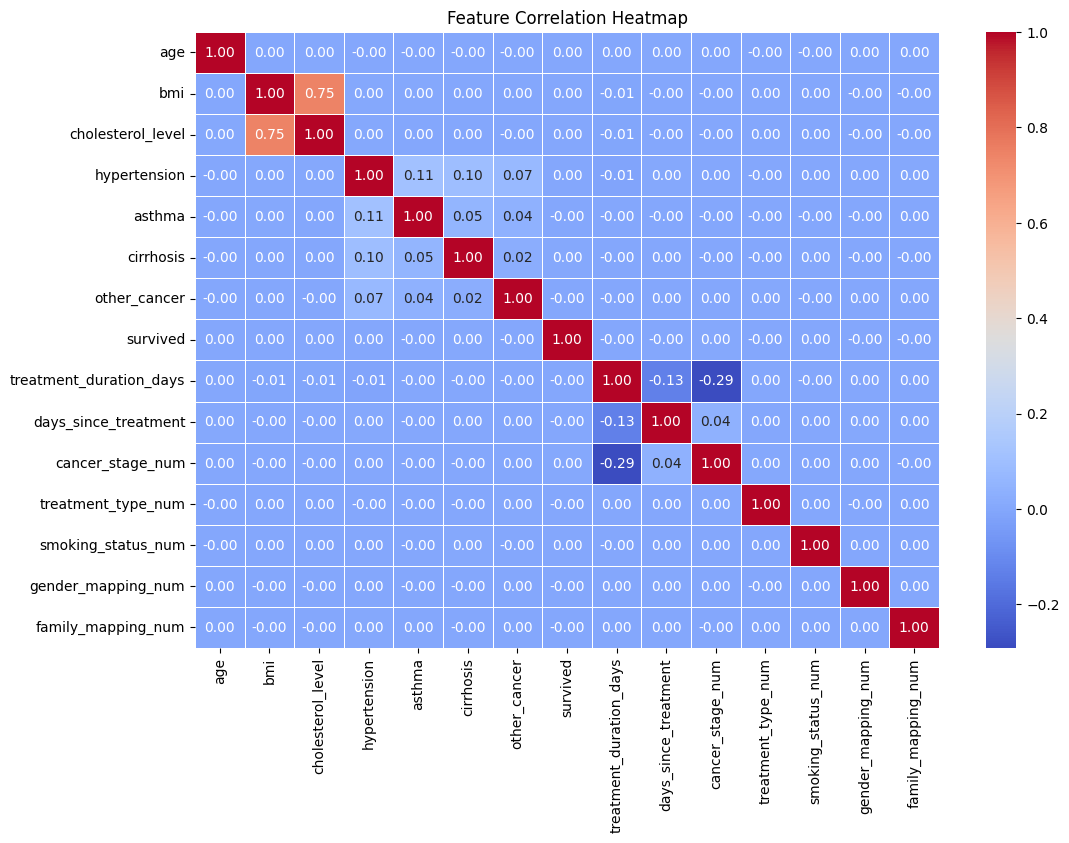

In [25]:
# Select only numerical columns
numerical_df = data.select_dtypes(include=['number'])

# Compute correlation
corr_matrix = numerical_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f',linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()


In [26]:
from sklearn.preprocessing import MinMaxScaler


In [27]:
scaler = MinMaxScaler()

# Normalize the numerical columns
data[data.select_dtypes(include=['number']).columns] = scaler.fit_transform(data.select_dtypes(include=['number']))


In [28]:
data

,age,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,survived,treatment_duration_days,days_since_treatment,cancer_stage_num,treatment_type_num,smoking_status_num,gender_mapping_num,family_mapping_num
0,0.60,0.462069,0.326667,0.0,0.0,1.0,0.0,0.0,0.621572,0.758637,0.000000,0.333333,1.000000,0.0,0.0
1,0.46,0.868966,0.866667,1.0,1.0,0.0,0.0,1.0,0.440585,0.169645,0.666667,0.000000,1.000000,1.0,0.0
2,0.61,0.965517,0.786667,1.0,1.0,0.0,0.0,0.0,0.341865,0.186085,0.666667,1.000000,0.333333,1.0,0.0
3,0.47,0.931034,0.606667,1.0,1.0,0.0,0.0,0.0,0.475320,0.791994,0.000000,0.333333,1.000000,1.0,1.0
4,0.33,0.127586,0.186667,0.0,0.0,0.0,0.0,0.0,0.407678,0.120801,0.000000,1.000000,1.000000,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
889995,0.36,0.993103,0.620000,1.0,1.0,1.0,0.0,0.0,0.098720,0.284012,1.000000,0.666667,1.000000,0.0,1.0
889996,0.58,0.193103,0.600000,0.0,0.0,0.0,0.0,0.0,0.819013,0.778413,0.333333,0.000000,0.333333,1.0,0.0
889997,0.44,0.779310,0.613333,1.0,0.0,0.0,0.0,1.0,0.217550,0.813438,0.666667,1.000000,0.666667,1.0,0.0
889998,0.63,0.089655,0.293333,1.0,1.0,0.0,0.0,0.0,0.983547,0.736478,1.000000,0.333333,0.333333,1.0,0.0


In [29]:
from sklearn.linear_model import LogisticRegression


In [30]:
X = data.drop(columns=['survived'])
y = data['survived']


In [31]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Split the remaining 30% into 15% validation and 15% test
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Print sizes
print(f"Train size: {X_train.shape}, Validation size: {X_val.shape}, Test size: {X_test.shape}")


Train size: (623000, 14), Validation size: (133500, 14), Test size: (133500, 14)


In [32]:
# Train Logistic Regression Model

model = LogisticRegression(max_iter=400, solver='liblinear',penalty='l1',multi_class='ovr',verbose=10)
model.fit(X_train, y_train)

[LibLinear]

LogisticRegression(max_iter=400, multi_class='ovr', penalty='l1',
                   solver='liblinear', verbose=10)

##### class sklearn.linear_model.LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='deprecated', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)

In [33]:
# Predict and evaluate on validation set
y_val_pred = model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)


In [34]:
# Predict and evaluate on test set
y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)


In [35]:

print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


Validation Accuracy: 0.7798
Test Accuracy: 0.7798


In [36]:
!pip install xgboost


In [37]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



In [38]:
from sklearn.model_selection import GridSearchCV

In [39]:
xgb_model = XGBClassifier(n_estimators=100, random_state=42)


In [40]:
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)


In [41]:
print("\nXGBoost Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))


XGBoost Classifier
Accuracy: 0.7797003745318352
Classification Report:
              precision    recall  f1-score   support

         0.0       0.78      1.00      0.88    104100
         1.0       0.25      0.00      0.00     29400

    accuracy                           0.78    133500
   macro avg       0.51      0.50      0.44    133500
weighted avg       0.66      0.78      0.68    133500

Confusion Matrix:
[[104085     15]
 [ 29395      5]]


In [42]:
rfc_model = RandomForestClassifier(n_estimators=100,random_state=42)


In [43]:
rfc_model.fit(X_train,y_train)
rfc_pred = rfc_model.predict(X_test)


In [44]:
print("\nRandom forest Classifier")
print("Accuracy:", accuracy_score(y_test, rfc_pred))
print("Classification Report:")
print(classification_report(y_test, rfc_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, rfc_pred))



Random forest Classifier
Accuracy: 0.7796179775280899
Classification Report:
              precision    recall  f1-score   support

         0.0       0.78      1.00      0.88    104100
         1.0       0.14      0.00      0.00     29400

    accuracy                           0.78    133500
   macro avg       0.46      0.50      0.44    133500
weighted avg       0.64      0.78      0.68    133500

Confusion Matrix:
[[104075     25]
 [ 29396      4]]
